# In The Mood For Love

Projeto inspirado pelo filme In The Mood For Love do diretor Wong Kar-Wai.

Passos:
1. Extrair trecho do filme e separar em cenas. Duas opções: utilizar o método do ffmpeg ou a biblioteca scenedetect.
2. Extrair frames das cenas para analisar imagem (hue, saturação...).
3. Extrair áudio das cenas e coletar informações como nível médio de áudio e silêncio.

Fazer funcionar antes para depois melhorar.
Pontos a melhorar: adicionar mais atributos de audio e de imagem, extrair mais de um frame por cena, otimizar detecção de cenas...

In [84]:
import pandas as pd 
import numpy as np 

In [85]:
from importlib import reload
import sys
sys.path.append('../src')

import utils 
import scene_detection
import feature_extraction 
import visualization
import clustering 
import save_video

reload(utils)
reload(scene_detection)
reload(feature_extraction)
reload(visualization)
reload(clustering)
reload(save_video)

from utils import get_video_info
from scene_detection import detect_scene_low_resolution
from feature_extraction import audio_features, extract_frames, image_features, movement_features
from visualization import plot_rms_silence, plot_color_features, plot_movement, plot_cluster_timeline, plot_scatter_umap, plot_scatter_pca
from clustering import clustering 
from save_video import write_top2_cluster_videos

In [ ]:
# Fazer um pre processamento logo depois da detecção de cenas
# Excluir cenas com menos de 1 segundo e mais de 20 segundos, por exemplo
# Ou excluir cenas com menos de 4 e mais de 12 segundos 
# Utilizar essas cenas para a clusterização e montagem do edit/highlight 

# Utilizar somente os valors de R, G e B e achar 3 clusters. Fazer montagem. 

# Achar momento do início e final do filme sem os creditos para não detectar cenas nesses momentos 

In [ ]:
video_name = 'fullMovie' # snippet, long, fullMovie 
file_extension = '.mp4' 
video_file =  video_name + file_extension 

df = pd.DataFrame() 
df = detect_scene_low_resolution(video_file) 

In [ ]:
print(get_video_info(video_file))

{'duration': 549.215333, 'fps': 23.976023976023978, 'width': 3584, 'height': 2160, 'size_bytes': 1128533229}


In [ ]:
# df = audio_features(video_file, df) 
df = extract_frames(video_file, df) 
df = image_features(df) 

# df = movement_features(video_file, df) 
# testar depois: usar lowres e ver se valores obtidos pelo original e lowres sao iguais 
# resultado: valores diferentes 

In [ ]:
# df.to_csv(f'data/{video_name}.csv', index=False)

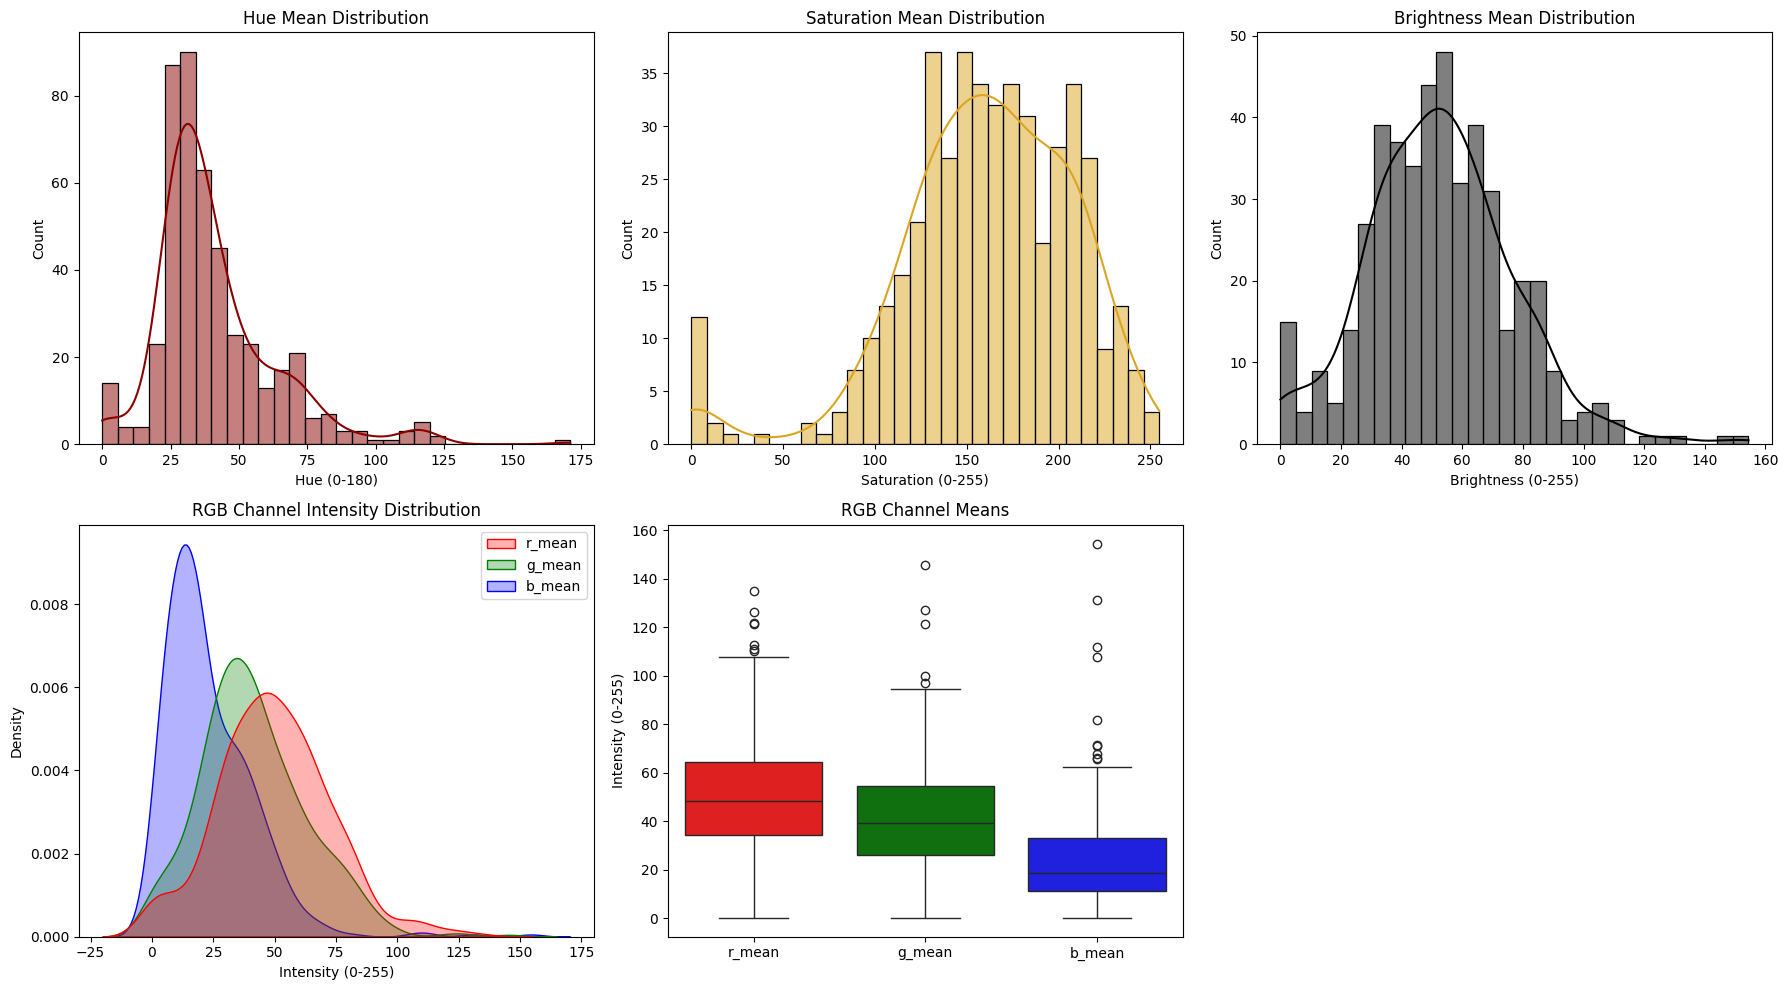

In [ ]:
# Visualization of audio, image and movement features 
# plot_rms_silence(df) 
plot_color_features(df)
# plot_movement(df)

# salvar gráfico de imagem em ../data como snippet_img_features.png

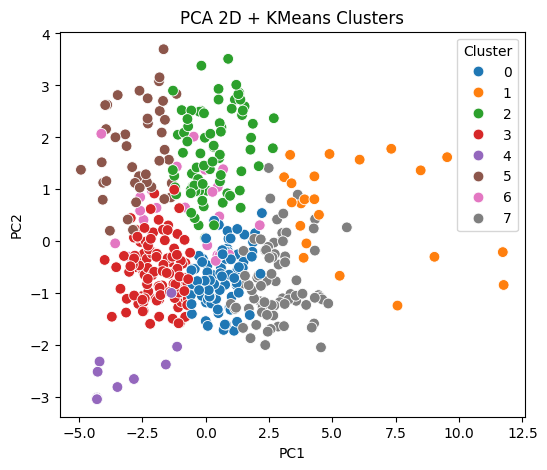

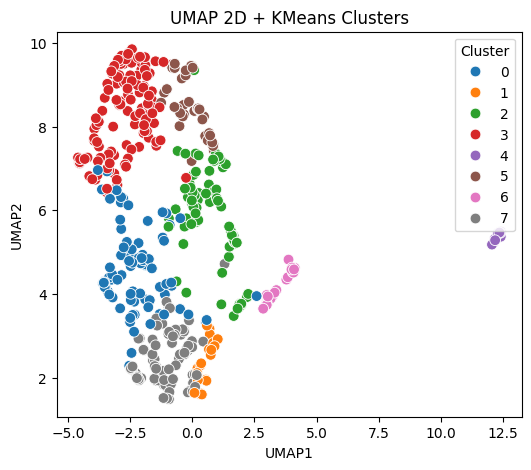

In [92]:
df = clustering(video_name=video_name, n_clusters=8)
plot_scatter_pca(df)
plot_scatter_umap(df)

# plot_cluster_timeline(df)

In [89]:
write_top2_cluster_videos(
    df,
    video_file=f"data/{video_file[:-4]}_lowres.mp4",
    output_dir="data/highlight"
)

video path: /home/rafa/Documents/projects/git/cinematic-data-clustering/data/fullMovie_lowres.mp4
shot: 8        46.533333
10       74.000000
13       92.733333
32      256.400000
52      476.400000
          ...     
421    5231.466667
428    5307.733333
439    5358.400000
454    5496.933333
459    5594.733333
Name: start, Length: 124, dtype: float64


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

▶️  Vídeo cluster 3 salvo em: /home/rafa/Documents/projects/git/cinematic-data-clustering/data/highlight/data_cluster_3.mp4
shot: 4        14.733333
6        22.000000
9        51.666667
14      101.200000
15      105.533333
          ...     
442    5380.000000
445    5435.066667
451    5471.066667
453    5480.066667
455    5519.733333
Name: start, Length: 84, dtype: float64


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

▶️  Vídeo cluster 0 salvo em: /home/rafa/Documents/projects/git/cinematic-data-clustering/data/highlight/data_cluster_0.mp4


    Last message repeated 81 times
frame=10936 fps=0.0 q=-1.0 Lsize=   68153kB time=00:18:13.50 bitrate= 510.6kbits/s speed=4.04e+03x    
video:68108kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.065922%
